# Hopfield Networks
Entirely built from description in the following video: https://www.youtube.com/watch?v=1WPJdAW-sFo&t=1369s&ab_channel=ArtemKirsanov 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Network:
    def __init__(self, nos_neurons):
        self.neurons = np.zeros(nos_neurons)
        self.weights = np.random.uniform(-1, 1, (nos_neurons, nos_neurons))
        for i in range(nos_neurons):
            self.weights[i, i] = 0

    def energy(self):
        energy = 0
        for i in range(len(self.neurons)):
            for j in range(len(self.neurons)):
                if i < j:
                    energy += self.weights[i,j] * self.neurons[i] * self.neurons[j]
        return -energy
    
    def update_neurons_one_iter(self):
        for i in range(len(self.neurons)):
            h_i = 0
            for j in range(len(self.neurons)):
                if i != j:
                    h_i += self.weights[i,j] * self.neurons[j]
            if h_i > 0: self.neurons[i] = 1
            else: self.neurons[i] = -1
    
    def update_neurons_n_iter(self, n):
        for i in range(n):
            self.update_neurons_one_iter()

    def update_weights_one_iter(self):
        for i in range(len(self.neurons)):
            for j in range(len(self.neurons)):
                if i != j:
                    self.weights[i,j] += self.neurons[i] * self.neurons[j]
    
    def learn_one_pattern(self, pattern):
        self.neurons = pattern.flatten()
        self.update_weights_one_iter()
    
    def visualize_neurons(self):
        dimensions = int(np.sqrt(len(self.neurons)))
        plt.imshow(self.neurons.reshape(dimensions, dimensions), cmap='gray')
        plt.axis('off')
        plt.show()

    def visualize_weights(self):
        plt.imshow(self.weights, cmap='gray')
        plt.axis('off')
        plt.show()

    def reset_neurons(self):
        self.neurons = np.random.choice([0, 1], len(self.neurons))

In [8]:
def add_noise(pattern, p):
    noisy_pattern = np.copy(pattern)
    # Generate a random matrix of the same shape as the pattern
    noise = np.random.rand(*pattern.shape) < p
    # Flip values where noise is True
    noisy_pattern[noise] = 1 - noisy_pattern[noise]
    return noisy_pattern


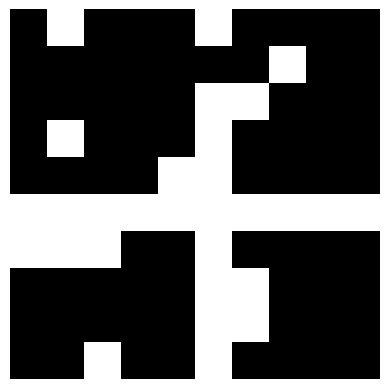

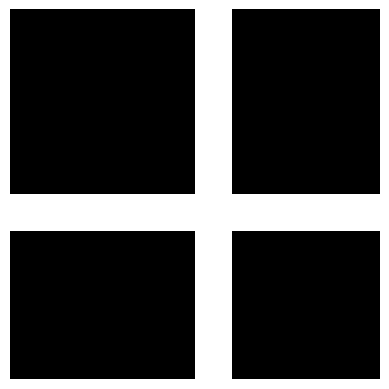

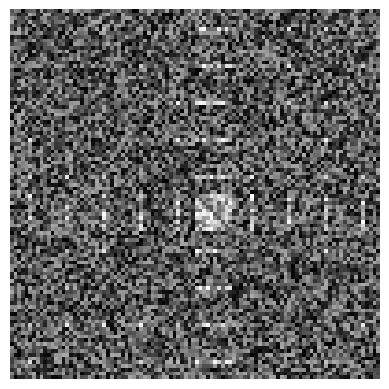

In [13]:
NOS_NEURONS = 10*10
if NOS_NEURONS**0.5 % 1 != 0:
    raise ValueError("Number of neurons must be a perfect square")
mynet = Network(NOS_NEURONS)

# make a pattern 
cross = np.zeros((10, 10), dtype=int)
cross[5, :] = 1
cross[:, 5] = 1
pattern = cross
# pattern = np.random.choice([-1, 1], NOS_NEURONS, see)
plt.imshow(add_noise(pattern, 0.1).reshape(10, 10), cmap='gray')
plt.axis('off')
plt.show()
mynet.learn_one_pattern(pattern)
# mynet.reset_neurons()
mynet.visualize_neurons()   
mynet.visualize_weights()
